## IMPORTING LIBRARIES

In [1]:
import pandas as pd # import libraries 
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns 
from scipy import stats
import pandas_profiling
import os
df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from numpy import loadtxt

from xgboost import XGBClassifier
import xgboost

from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

In [2]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [3]:
df.head(10) # display whether the heart failure data has been loaded

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

In [4]:
df.tail(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
289  90.0        1                       337         0                 38   
290  45.0        0                       615         1                 55   
291  60.0        0                       320         0                 35   
292  52.0        0                       190         1                 38   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
289                    0   390000.0               0.9           144    0   
290                    0   222000.0               0.8           141    0   
291                    0   133000.0               1.4           139    1   
292                    0   382000.0               1.0           140    1   
293                    0   179000.0               0.9           136    1   
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
289        0   256            0  
290        0   257            0  
291        0   258            0  
292        1   258            0  
293        1   270            0  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

In [5]:
df.isnull().sum() #check all the null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [8]:
profiling = pandas_profiling.ProfileReport(df)
profiling.to_file("profiling.html")
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
from IPython.display import display, HTML # a summary of the 5 number summary of the discrete features
display(HTML('<b>Table 1: Summary of discrete features</b>'))
df.describe(include=['int64']).round(3)

anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
count  299.000                   299.000   299.000            299.000   
mean     0.431                   581.839     0.418             38.084   
std      0.496                   970.288     0.494             11.835   
min      0.000                    23.000     0.000             14.000   
25%      0.000                   116.500     0.000             30.000   
50%      0.000                   250.000     0.000             38.000   
75%      1.000                   582.000     1.000             45.000   
max      1.000                  7861.000     1.000             80.000   

       high_blood_pressure  serum_sodium      sex  smoking     time  \
count              299.000       299.000  299.000  299.000  299.000   
mean                 0.351       136.625    0.649    0.321  130.261   
std                  0.478         4.412    0.478    0.468   77.614   
min                  0.000       113.000    0.000    0.000    4.000   
25%                  0.000       134.000    0.000    0.000   73.000   
50%                  0.000       137.000    1.000    0.000  115.000   
75%                  1.000       140.000    1.000    1.000  203.000   
max                  1.000       148.000    1.000    1.000  285.000   

       DEATH_EVENT  
count      299.000  
mean         0.321  
std          0.468  
min          0.000  
25%          0.000  
50%          0.000  
75%          1.000  
max          1.000

In [10]:
from IPython.display import display, HTML  # a summary of the 5 number summary of the continuous features
display(HTML('<b>Table 2: Summary of continuous features</b>'))
df.describe(include=['float64']).round(3)

age   platelets  serum_creatinine
count  299.000     299.000           299.000
mean    60.834  263358.029             1.394
std     11.895   97804.237             1.035
min     40.000   25100.000             0.500
25%     51.000  212500.000             0.900
50%     60.000  262000.000             1.100
75%     70.000  303500.000             1.400
max     95.000  850000.000             9.400

### Data Exploration of variables

EXPLORING EACH COLUMNS

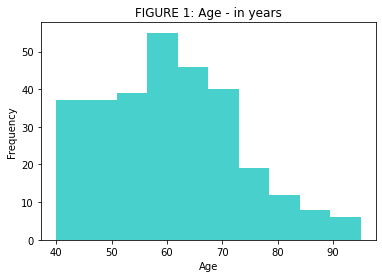

In [11]:
colour_list = ['mediumturquoise'] 
df['age'].plot(kind='hist',bins=10 ,color = colour_list)
plt.title('FIGURE 1: Age - in years')
plt.xlabel('Age')
plt.show()

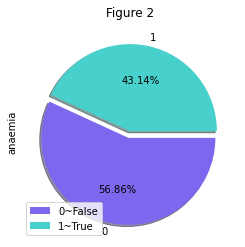

In [12]:
explode = (0.08, 0)
color_list = ['mediumslateblue','mediumturquoise']
df['anaemia'].value_counts().plot(kind='pie',autopct='%.2f%%',colors= color_list,explode= explode, counterclock =False, shadow =True)
plt.title ("Figure 2")
labels = ['0~False','1~True']
plt.legend(labels,loc=3)
plt.show()

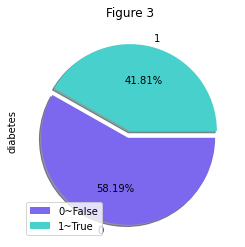

In [13]:
explode = (0.08, 0)
color_list = ['mediumslateblue','mediumturquoise']
df['diabetes'].value_counts().plot(kind='pie',autopct='%.2f%%',colors= color_list,explode= explode, counterclock =False, shadow =True)
labels = ['0~False','1~True']
plt.title ("Figure 3")#NEEED TO FIX THIS TITLE
plt.legend(labels,loc=3)
plt.show()

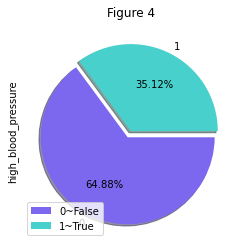

In [14]:
explode = (0.08, 0)
color_list = ['mediumslateblue','mediumturquoise']
df['high_blood_pressure'].value_counts().plot(kind='pie',autopct='%.2f%%',colors= color_list,explode= explode, counterclock =False, shadow =True)
labels = ['0~False','1~True']
plt.title ("Figure 4")#NEEED TO FIX THIS TITLE
plt.legend(labels,loc=3)
plt.show()

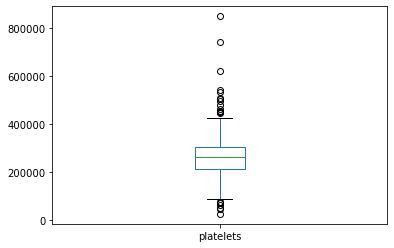

In [15]:
df[['platelets']].plot(kind='box') 
plt.show()

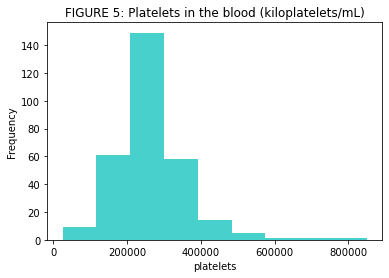

In [16]:
colour_list = ['mediumturquoise']
df['platelets'].plot(kind='hist',bins=9, color = colour_list)
plt.title('FIGURE 5: Platelets in the blood (kiloplatelets/mL)')
plt.xlabel('platelets')
plt.show()

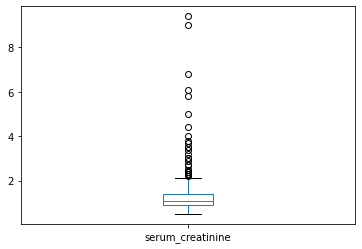

In [17]:
df[['serum_creatinine']].plot(kind='box') 
plt.show()

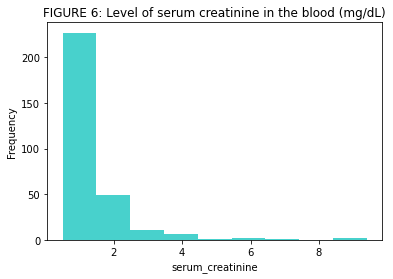

In [18]:
colour_list = ['mediumturquoise'] 
df['serum_creatinine'].plot(kind='hist',bins=9, color = colour_list)
plt.title('FIGURE 6: Level of serum creatinine in the blood (mg/dL)')
plt.xlabel('serum_creatinine')
plt.show()

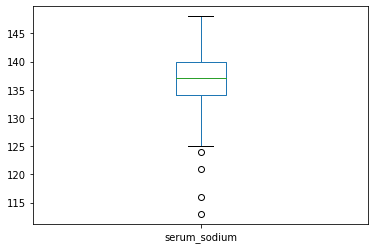

In [19]:
df[['serum_sodium']].plot(kind='box') 
plt.show()

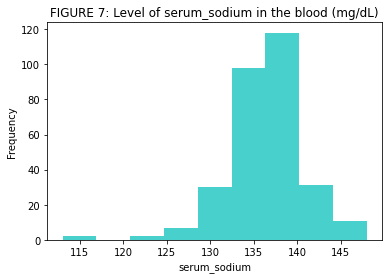

In [20]:
colour_list = ['mediumturquoise'] 
df['serum_sodium'].plot(kind='hist',bins=9, color = colour_list)
plt.title('FIGURE 7: Level of serum_sodium in the blood (mg/dL)')
plt.xlabel('serum_sodium')
plt.show()

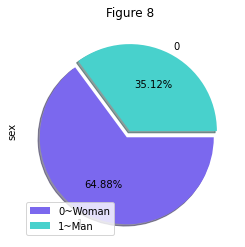

In [21]:
explode = (0.08, 0)
color_list = ['mediumslateblue','mediumturquoise']
df['sex'].value_counts().plot(kind='pie',autopct='%.2f%%',colors= color_list,explode= explode, counterclock =False, shadow =True)
labels = ['0~Woman','1~Man']
plt.title ("Figure 8")
plt.legend(labels,loc=3)
plt.show()

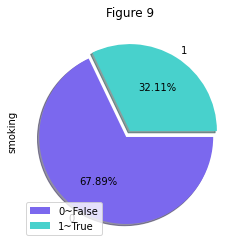

In [22]:
explode = (0.08, 0)
color_list = ['mediumslateblue','mediumturquoise']
df['smoking'].value_counts().plot(kind='pie',autopct='%.2f%%',colors= color_list,explode= explode, counterclock =False, shadow =True)
labels = ['0~False','1~True']
plt.title ("Figure 9")
plt.legend(labels,loc=3)
plt.show()

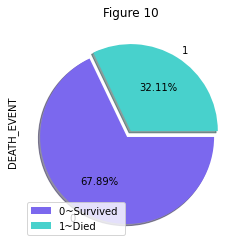

In [23]:
explode = (0.08, 0)
color_list = ['mediumslateblue','mediumturquoise']
df['DEATH_EVENT'].value_counts().plot(kind='pie',autopct='%.2f%%',colors= color_list,explode= explode, counterclock =False, shadow =True)
labels = ['0~Survived ','1~Died']
plt.title ("Figure 10")
plt.legend(labels,loc=3)
plt.show()

### Exploration of variables graphed against each other


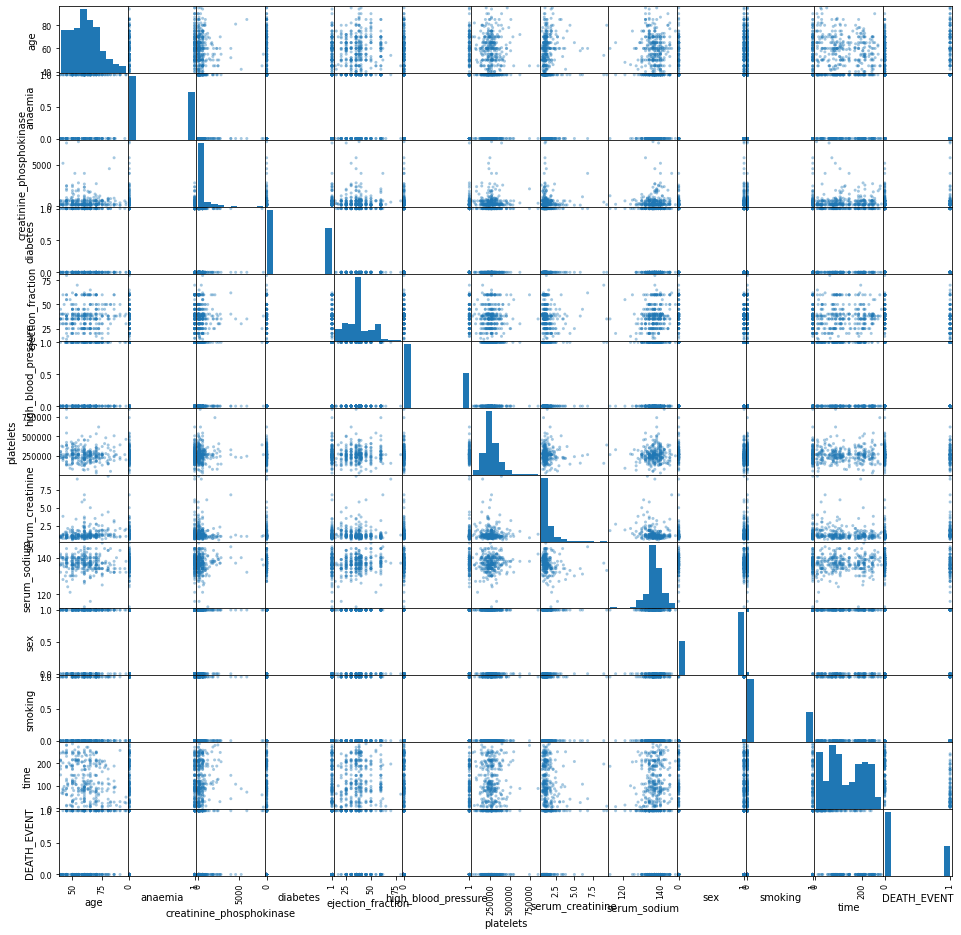

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha=0.4,figsize=(16,16),diagonal='hist')
plt.show()

### Exploratory Data Analysis

(-0.041198077112563826, 0.47789094137362714)


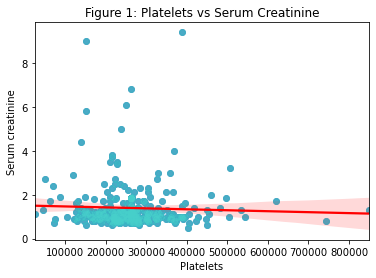

In [25]:
data = df
colour_list = ['mediumturquoise']

pearson_coef = stats.pearsonr(df['platelets'], df['serum_creatinine']) # pearsons correlation coefficient and p value
print(pearson_coef)

x=data['platelets']
y=data['serum_creatinine']

sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.scatter(x, y, alpha = 0.4, color = colour_list)
plt.title("Figure 1: Platelets vs Serum Creatinine", fontsize = 12)
plt.xlabel('Platelets')
plt.ylabel('Serum creatinine')
plt.show()

(0.1591871332835501, 0.0058034329412028325)


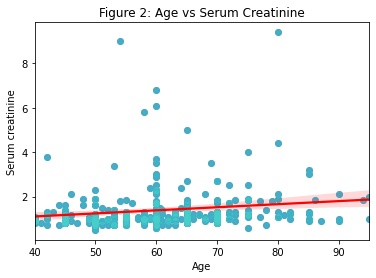

In [26]:
data = df
colour_list = ['mediumturquoise']

pearson_coef = stats.pearsonr(df['age'], df['serum_creatinine'])
print(pearson_coef)

x=data['age']
y=data['serum_creatinine']

sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.scatter(x, y, alpha = 0.4, color = colour_list)
plt.title("Figure 2: Age vs Serum Creatinine", fontsize = 12)
plt.xlabel('Age')
plt.ylabel('Serum creatinine')
plt.show()

(-0.016408479546217346, 0.777514366344878)


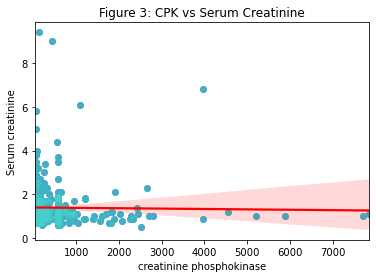

In [27]:
data = df
colour_list = ['mediumturquoise']

pearson_coef = stats.pearsonr(df['creatinine_phosphokinase'], df['serum_creatinine'])
print(pearson_coef)

x=data['creatinine_phosphokinase']
y=data['serum_creatinine']

sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.scatter(x, y, alpha = 0.4, color = colour_list)
plt.title("Figure 3: CPK vs Serum Creatinine", fontsize = 12)
plt.xlabel('creatinine phosphokinase')
plt.ylabel('Serum creatinine')
plt.show()

(-0.011302474995417353, 0.845686017379956)


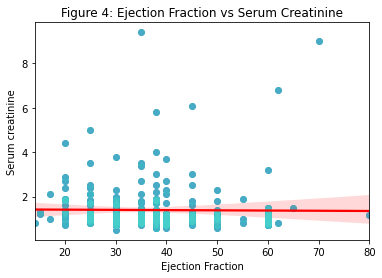

In [28]:
data = df
colour_list = ['mediumturquoise']

pearson_coef = stats.pearsonr(df['ejection_fraction'], df['serum_creatinine'])
print(pearson_coef)

x=data['ejection_fraction']
y=data['serum_creatinine']

sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.scatter(x, y, alpha = 0.4, color = colour_list)
plt.title("Figure 4: Ejection Fraction vs Serum Creatinine", fontsize = 12)
plt.xlabel('Ejection Fraction')
plt.ylabel('Serum creatinine')
plt.show()

(-0.1890952100911739, 0.0010170806879367838)


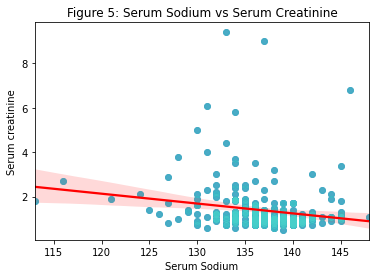

In [29]:
data = df
colour_list = ['mediumturquoise']

pearson_coef = stats.pearsonr(df['serum_sodium'], df['serum_creatinine'])
print(pearson_coef)

x=data['serum_sodium']
y=data['serum_creatinine']

sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.scatter(x, y, alpha = 0.4, color = colour_list)
plt.title("Figure 5: Serum Sodium vs Serum Creatinine", fontsize = 12)
plt.xlabel('Serum Sodium')
plt.ylabel('Serum creatinine')
plt.show()

(-0.14931541756792863, 0.009720948290826599)


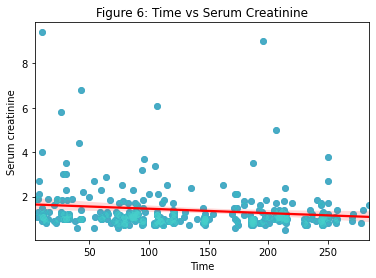

In [30]:
data = df
colour_list = ['mediumturquoise']

pearson_coef = stats.pearsonr(df['time'], df['serum_creatinine'])
print(pearson_coef)

x=data['time']
y=data['serum_creatinine']

sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.scatter(x, y, alpha = 0.4, color = colour_list)
plt.title("Figure 6: Time vs Serum Creatinine", fontsize = 12)
plt.xlabel('Time')
plt.ylabel('Serum creatinine')
plt.show()

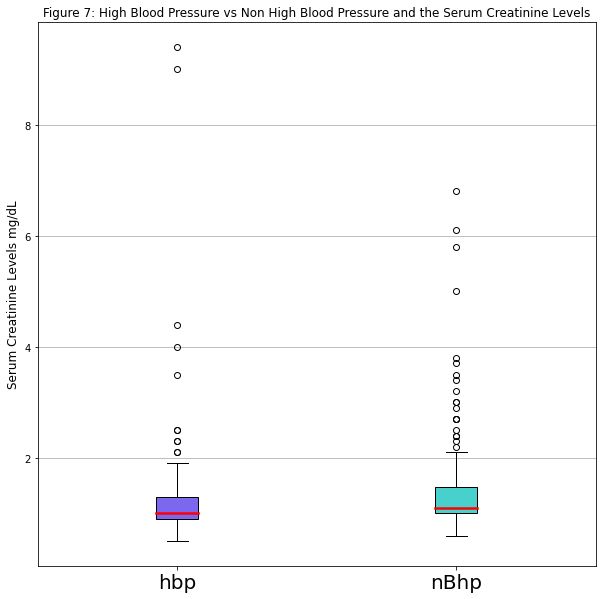

In [31]:
#boxplot comparison of high blood pressure and non high blood pressure against Serum creatininine 
hbp= df.loc[df['high_blood_pressure'] == 1]['serum_creatinine']
nBhp= df[df['high_blood_pressure']==0]['serum_creatinine']
data = {'hbp': hbp, 'nBhp': nBhp}

fig, ax = plt.subplots(1,1, figsize=(10,10))
bplot = ax.boxplot(data.values(),patch_artist =True, medianprops=dict(color='red', linewidth=2.5))
ax.set_xticklabels(data.keys(),fontsize =20)
ax.yaxis.grid(True)

plt.title("Figure 7: High Blood Pressure vs Non High Blood Pressure and the Serum Creatinine Levels", fontsize =12)
plt.ylabel("Serum Creatinine Levels mg/dL", fontsize= 12)

colour_list = ['mediumslateblue','mediumturquoise']

for patch, color in zip(bplot['boxes'], colour_list):
        patch.set_facecolor(color)



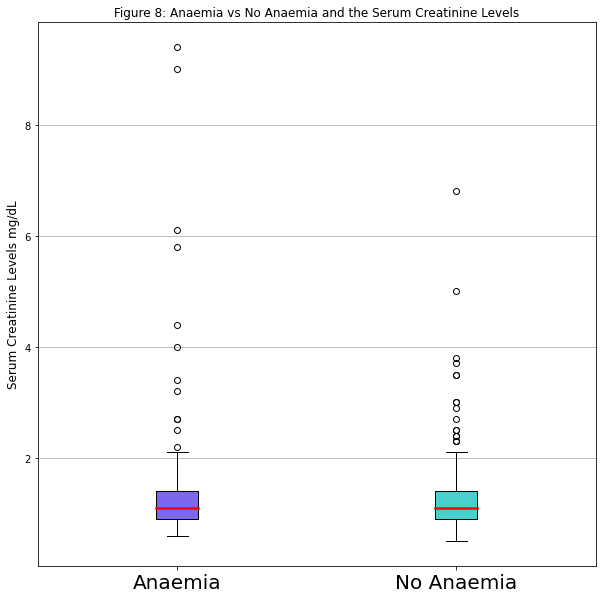

In [32]:
anaemia= df.loc[df['anaemia'] == 1]['serum_creatinine']
no_anaemia= df[df['anaemia']==0]['serum_creatinine']
data = {'Anaemia': anaemia, 'No Anaemia': no_anaemia}

fig, ax = plt.subplots(1,1, figsize=(10,10))
bplot = ax.boxplot(data.values(),patch_artist =True, medianprops=dict(color='red', linewidth=2.5))
ax.set_xticklabels(data.keys(),fontsize =20)
ax.yaxis.grid(True)

plt.title("Figure 8: Anaemia vs No Anaemia and the Serum Creatinine Levels", fontsize =12)
plt.ylabel("Serum Creatinine Levels mg/dL", fontsize= 12)

colour_list = ['mediumslateblue','mediumturquoise']

for patch, color in zip(bplot['boxes'], colour_list):
        patch.set_facecolor(color)



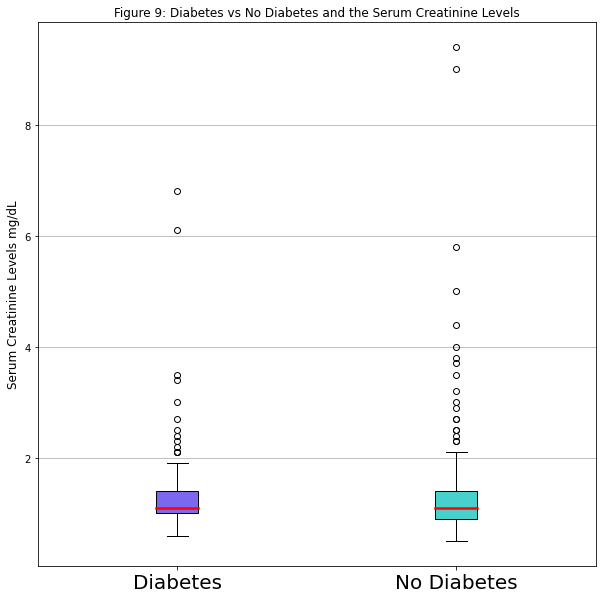

In [33]:
diabetes= df.loc[df['diabetes'] == 1]['serum_creatinine']
ndiabetes= df[df['diabetes']==0]['serum_creatinine']
data = {'Diabetes': diabetes, 'No Diabetes': ndiabetes}

fig, ax = plt.subplots(1,1, figsize=(10,10))
bplot = ax.boxplot(data.values(),patch_artist =True, medianprops=dict(color='red', linewidth=2.5))
ax.set_xticklabels(data.keys(),fontsize =20)
ax.yaxis.grid(True)

plt.title("Figure 9: Diabetes vs No Diabetes and the Serum Creatinine Levels", fontsize =12)
plt.ylabel("Serum Creatinine Levels mg/dL", fontsize= 12)

colour_list = ['mediumslateblue','mediumturquoise']

for patch, color in zip(bplot['boxes'], colour_list):
        patch.set_facecolor(color)



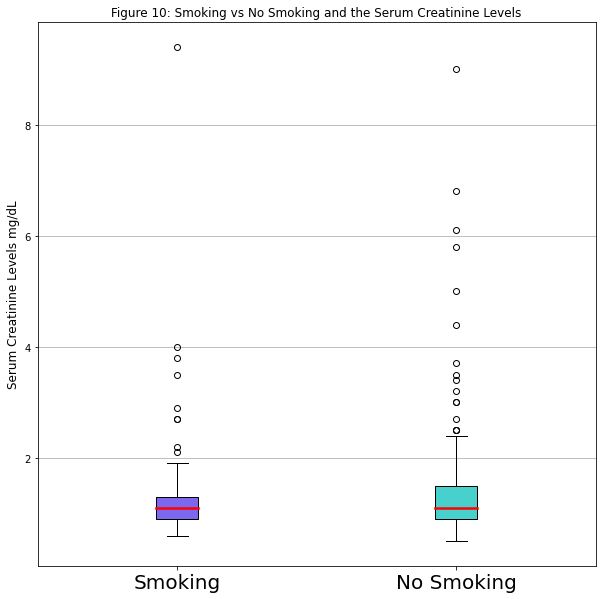

In [34]:
smoking= df.loc[df['smoking'] == 1]['serum_creatinine']
nsmoking= df[df['smoking']==0]['serum_creatinine']
data = {'Smoking': smoking, 'No Smoking': nsmoking}

fig, ax = plt.subplots(1,1, figsize=(10,10))
bplot = ax.boxplot(data.values(),patch_artist =True, medianprops=dict(color='red', linewidth=2.5))
ax.set_xticklabels(data.keys(),fontsize =20)
ax.yaxis.grid(True)

plt.title("Figure 10: Smoking vs No Smoking and the Serum Creatinine Levels", fontsize =12)
plt.ylabel("Serum Creatinine Levels mg/dL", fontsize= 12)

colour_list = ['mediumslateblue','mediumturquoise']

for patch, color in zip(bplot['boxes'], colour_list):
        patch.set_facecolor(color)



# DATA TRAINING 

In [35]:
selected_features = ['ejection_fraction','serum_creatinine','time','serum_sodium','age']

x = df[['ejection_fraction','serum_creatinine','time','serum_sodium','age']]

X = df[selected_features]
y = df["DEATH_EVENT"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)
cv = KFold(n_splits=10, random_state=1, shuffle=True) # 10 k fold cross validation

In [36]:
clf = DecisionTreeClassifier(max_depth =2)
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy Decision Tree MODEL: %.3f (%.3f)' % (mean(scores), std(scores)))
lr_model = LogisticRegression()
scores = cross_val_score(lr_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy LR MODEL: %.3f (%.3f)' % (mean(scores), std(scores)))
gradient_boot_model = GradientBoostingClassifier( learning_rate=1.0,max_depth=2)
scores = cross_val_score(gradient_boot_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy Gradient Boost MODEL: %.3f (%.3f)' % (mean(scores), std(scores)))
xgb=XGBClassifier(max_depth=2)
scores = cross_val_score(xgb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy XGBoost MODEL: %.3f (%.3f)' % (mean(scores), std(scores)))
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy knn MODEL: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy Decision Tree MODEL: 0.840 (0.053)
Accuracy LR MODEL: 0.836 (0.062)
Accuracy Gradient Boost MODEL: 0.773 (0.067)
Accuracy XGBoost MODEL: 0.843 (0.067)
Accuracy knn MODEL: 0.836 (0.076)


### Hyperparameter tuning with Gridsearch for KNN

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [38]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print("train rmse", train_rmse)
print("test rmse",test_rmse)
print(gridsearch.best_params_)

train rmse 0.35145043846728735
test rmse 0.2931142745780773
{'n_neighbors': 22}


In [39]:
knn = KNeighborsClassifier(n_neighbors=22)
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy mean knn MODEL: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy mean knn MODEL: 0.836 (0.062)


In [40]:
kn_clf = KNeighborsClassifier(n_neighbors=22)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
kn_acc = accuracy_score(y_test, kn_pred)
print("Accuracy of KNN classifier is ", 100*kn_acc,"%")

Accuracy of KNN classifier is  90.0 %


<Figure size 432x288 with 0 Axes>

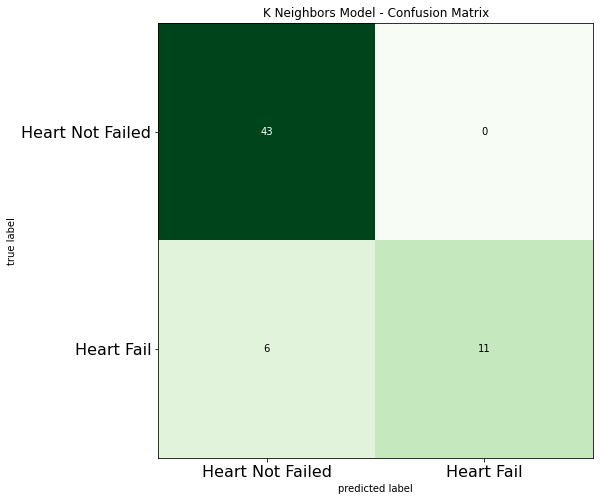

In [41]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Greens)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()


### Decision Tree Classifcation

In [42]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Accuracy of Decision Tree classifier is ", 100*dt_acc,"%")

Accuracy of Decision Tree classifier is  90.0 %


<Figure size 432x288 with 0 Axes>

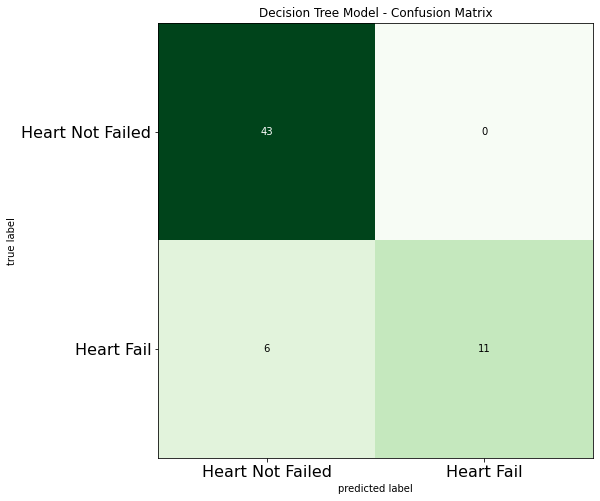

In [43]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Greens)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### XGBoost Classifcation

[00:45:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<Figure size 432x288 with 0 Axes>

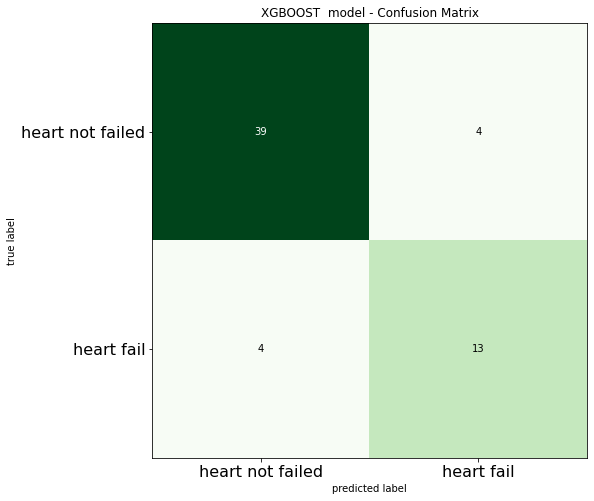

Accuracy of XGboost classifier is  86.66666666666667 %


In [44]:
clf=xgboost.XGBClassifier(max_depth=2,random_state=666)
clf.fit(X_train,y_train)
preds=clf.predict(X_test)

xgb_acc = accuracy_score(y_test, preds)
cm = confusion_matrix(y_test, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Greens)
plt.title("XGBOOST  model - Confusion Matrix")
plt.xticks(range(2), ["heart not failed","heart fail"], fontsize=16)
plt.yticks(range(2), ["heart not failed","heart fail"],fontsize=16)
plt.show()
print("Accuracy of XGboost classifier is ", 100*xgb_acc,"%")


### Gradient Boosting Classifier

In [45]:
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(X_train,y_train)
gradientboost_pred = gradientboost_clf.predict(X_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
print("Accuracy of XGboost classifier is ", 100*gradientboost_acc,"%")


Accuracy of XGboost classifier is  93.33333333333333 %


<Figure size 432x288 with 0 Axes>

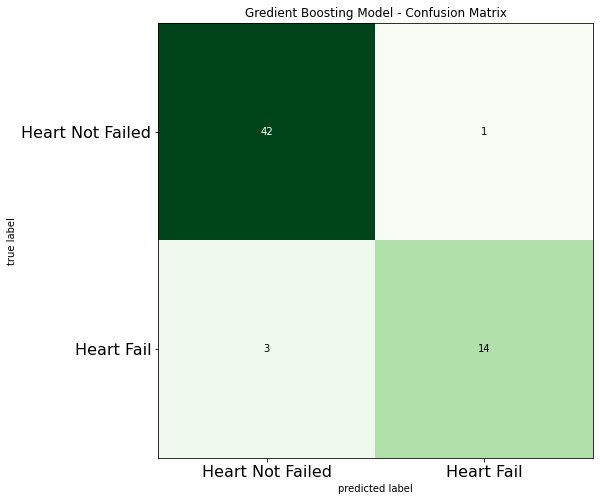

In [46]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Greens)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Logistic Regression Classifier

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print("Accuracy of Logistic Regression classifier is ", 100*log_reg_acc,"%")


Accuracy of Logistic Regression classifier is  90.0 %


<Figure size 432x288 with 0 Axes>

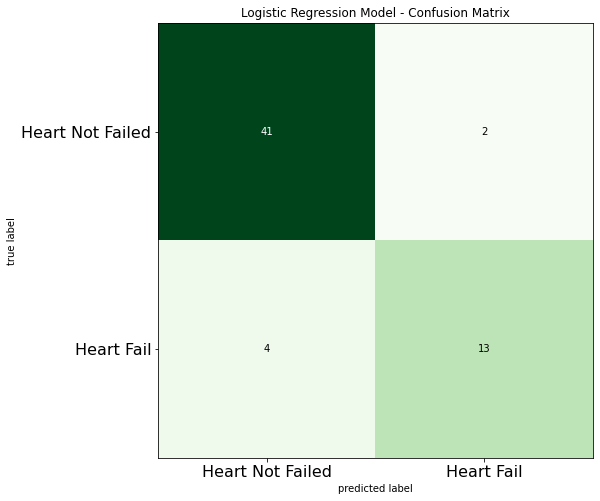

In [48]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Greens)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

#### ACKNOWLEDGMENTS 

https://realpython.com/knn-python/#a-step-by-step-knn-from-scratch-in-python

https://www.kaggle.com/code/nayansakhiya/heart-fail-analysis-and-quick-prediction/notebook#ABOUT-DATA



Link to dataset:
https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records